In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

# script for playing around with the different fifa-ratings from the different players of the season 2019-2020


In [3]:
#Read the data & clean useless columns
df = pd.read_csv('/home/miguel/Desktop/Archivos_Miguel/datos_liga/FIFA_Datasets/players_20.csv')
df=df.drop(axis=1,columns=['player_url','long_name','player_tags','lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb','rf','rw','lam','cam','ram','lm','lcm','ls','st','rs','lw','lf','cf','cm','rcm','rm','player_traits','nation_position','loaned_from','real_face','nation_jersey_number','player_tags'])

In [4]:
pd.set_option('display.max_columns', None)
df.head()

,sofifa_id,short_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,release_clause_eur,team_position,team_jersey_number,joined,contract_valid_until,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,158023,L. Messi,32,1987-06-24,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Medium/Low,Messi,195800000.0,RW,10.0,2004-07-01,2021.0,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8
1,20801,Cristiano Ronaldo,34,1985-02-05,187,83,Portugal,Juventus,93,93,58500000,405000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,96500000.0,LW,7.0,2018-07-10,2022.0,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11
2,190871,Neymar Jr,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,"LW, CAM",Right,5,5,5,High/Medium,Neymar,195200000.0,CAM,10.0,2017-08-03,2022.0,91.0,85.0,87.0,95.0,32.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11
3,200389,J. Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,GK,Right,3,3,1,Medium/Medium,Normal,164700000.0,GK,13.0,2014-07-16,2023.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,89.0,52.0,90.0,13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89
4,183277,E. Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,91,91,90000000,470000,"LW, CF",Right,4,4,4,High/Medium,Normal,184500000.0,LW,7.0,2019-07-01,2024.0,91.0,83.0,86.0,94.0,35.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22,11,12,6,8,8


In [5]:
# size of the dataframe

df.shape

(18278, 70)

In [6]:
#Eliminate goalkeeping scores for field players that are not goalkeepers 

df.loc[(df.player_positions != 'GK'),['goalkeeping_reflexes','goalkeeping_positioning','goalkeeping_kicking','goalkeeping_handling','goalkeeping_diving']]='NaN'


In [7]:
df.head()

,sofifa_id,short_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,release_clause_eur,team_position,team_jersey_number,joined,contract_valid_until,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,158023,L. Messi,32,1987-06-24,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Medium/Low,Messi,195800000.0,RW,10.0,2004-07-01,2021.0,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,NaN,NaN,NaN,NaN,NaN
1,20801,Cristiano Ronaldo,34,1985-02-05,187,83,Portugal,Juventus,93,93,58500000,405000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,96500000.0,LW,7.0,2018-07-10,2022.0,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,NaN,NaN,NaN,NaN,NaN
2,190871,Neymar Jr,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,"LW, CAM",Right,5,5,5,High/Medium,Neymar,195200000.0,CAM,10.0,2017-08-03,2022.0,91.0,85.0,87.0,95.0,32.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,NaN,NaN,NaN,NaN,NaN
3,200389,J. Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,GK,Right,3,3,1,Medium/Medium,Normal,164700000.0,GK,13.0,2014-07-16,2023.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,89.0,52.0,90.0,13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89
4,183277,E. Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,91,91,90000000,470000,"LW, CF",Right,4,4,4,High/Medium,Normal,184500000.0,LW,7.0,2019-07-01,2024.0,91.0,83.0,86.0,94.0,35.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22,NaN,NaN,NaN,NaN,NaN


In [8]:
#BEST GOALKEEPERS:

pd.set_option('display.max_rows', None)
df[(df['player_positions'] == 'GK') & (df['overall'] >= 87)]

,sofifa_id,short_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,release_clause_eur,team_position,team_jersey_number,joined,contract_valid_until,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
3,200389,J. Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,GK,Right,3,3,1,Medium/Medium,Normal,164700000.0,GK,13.0,2014-07-16,2023.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,89.0,52.0,90.0,13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89
6,192448,M. ter Stegen,27,1992-04-30,187,85,Germany,FC Barcelona,90,93,67500000,250000,GK,Right,3,4,1,Medium/Medium,Normal,143400000.0,GK,1.0,2014-07-01,2022.0,NaN,NaN,NaN,NaN,NaN,NaN,88.0,85.0,88.0,90.0,45.0,88.0,18,14,11,61,14,21,18,12,63,30,38,50,37,86,43,66,79,35,78,10,43,22,11,70,25,70,25,13,10,88,85,88,88,90
13,212831,Alisson,26,1992-10-02,191,91,Brazil,Liverpool,89,91,58000000,155000,GK,Right,3,3,1,Medium/Medium,Normal,111700000.0,GK,1.0,2018-07-19,2024.0,NaN,NaN,NaN,NaN,NaN,NaN,85.0,84.0,85.0,89.0,51.0,90.0,17,13,19,45,20,27,19,18,44,30,56,47,40,88,37,64,52,32,78,14,27,11,13,66,23,65,15,19,16,85,84,85,90,89
14,193080,De Gea,28,1990-11-07,192,82,Spain,Manchester United,89,90,56000000,205000,GK,Right,4,3,1,Medium/Medium,Lean,110600000.0,GK,1.0,2011-07-01,2020.0,NaN,NaN,NaN,NaN,NaN,NaN,90.0,84.0,81.0,92.0,58.0,85.0,17,13,21,50,13,18,21,19,47,38,57,58,63,87,43,61,67,43,60,12,38,30,12,65,29,68,25,21,13,90,84,81,85,92
25,210257,Ederson,25,1993-08-17,188,86,Brazil,Manchester City,88,91,54500000,185000,GK,Left,2,3,1,Medium/Medium,Normal,104900000.0,GK,31.0,2017-07-01,2024.0,NaN,NaN,NaN,NaN,NaN,NaN,86.0,82.0,93.0,88.0,63.0,86.0,20,14,14,56,18,23,15,20,58,40,64,63,60,87,48,70,66,41,68,18,38,27,20,70,17,70,29,15,8,86,82,93,86,88
28,192119,T. Courtois,27,1992-05-11,199,96,Belgium,Real Madrid,88,89,48000000,235000,GK,Left,4,2,1,Medium/Medium,Courtois,102000000.0,GK,13.0,2018-08-09,2024.0,NaN,NaN,NaN,NaN,NaN,NaN,85.0,89.0,72.0,87.0,49.0,85.0,14,14,13,33,12,13,19,20,35,23,46,52,61,83,45,54,68,38,70,17,23,15,13,44,27,66,20,18,16,85,89,72,85,87
30,162835,S. Handanovič,34,1984-07-14,193,92,Slovenia,Inter,88,88,26000000,110000,GK,Right,3,2,1,Medium/Medium,Normal,44200000.0,GK,1.0,2012-07-01,2021.0,NaN,NaN,NaN,NaN,NaN,NaN,88.0,85.0,69.0,89.0,53.0,89.0,12,10,10,36,12,12,12,14,34,16,51,55,47,83,36,52,78,41,71,19,25,22,12,41,23,69,25,10,13,88,85,69,89,89
31,167495,M. Neuer,33,1986-03-27,193,92,Germany,FC Bayern München,88,88,32000000,155000,GK,Right,5,4,1,Medium/Medium,Normal,52800000.0,GK,1.0,2011-07-01,2021.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,87.0,91.0,87.0,57.0,85.0,15,13,25,55,11,30,14,11,59,46,54,60,51,84,35,68,77,43,80,16,29,30,12,70,47,70,17,10,11,87,87,91,85,87
32,167948,H. Lloris,32,1986-12-26,188,82,France,Tottenham Hotspur,88,88,36000000,150000,GK,Left,4,1,1,Medium/Medium,Lean,66600000.0,GK,1.0,2012-08-31,2022.0,NaN,NaN,NaN,NaN,NaN,NaN,89.0,82.0,68.0,91.0,63.0,84.0,13,10,10,50,11,10,11,10,50,34,65,62,55,86,54,51,74,41,43,14,31,27,10,30,40,65,29,10,18,89,82,68,84,91
53,193041,K. Navas,32,1986-12-15,185,80,Costa Rica,Real Madrid,87,87,30500000,195000,GK,Right,3,3,1,Medium/Medium,Norm

In [9]:
# We visualize the porcentage of null data for the different variables
# The null data for pace, shooting, passing, dribbling, defending and physic are goalkeepers 
# The null data for gk_diving, gk_handling, gk_kicking, gk_reflexes gk_speed, gk_positioning are field players (not goalkeepers)


null_data = 100 * df.isnull().sum()/len(df)
pd.set_option('display.max_rows',None)
null_data

sofifa_id                      0.000000
short_name                     0.000000
age                            0.000000
dob                            0.000000
height_cm                      0.000000
weight_kg                      0.000000
nationality                    0.000000
club                           0.000000
overall                        0.000000
potential                      0.000000
value_eur                      0.000000
wage_eur                       0.000000
player_positions               0.000000
preferred_foot                 0.000000
international_reputation       0.000000
weak_foot                      0.000000
skill_moves                    0.000000
work_rate                      0.000000
body_type                      0.000000
release_clause_eur             7.101433
team_position                  1.313054
team_jersey_number             1.313054
joined                         7.046723
contract_valid_until           1.313054
pace                          11.139074


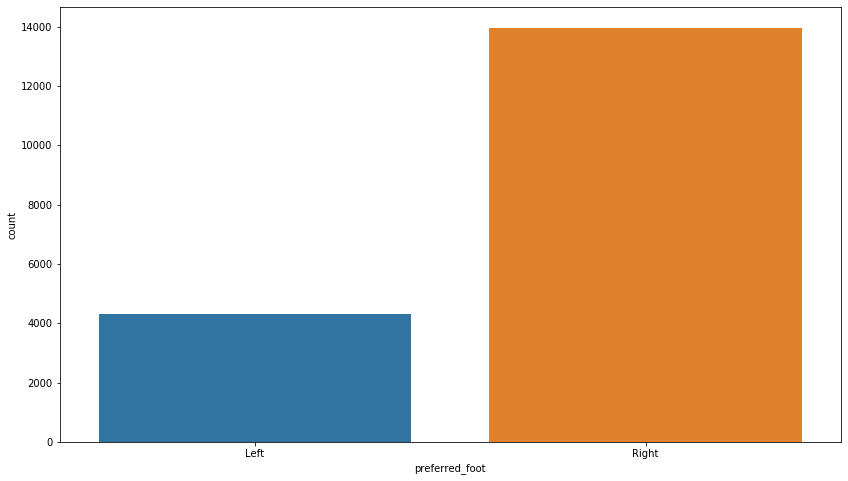

In [10]:
# Visualize number of right foot players vs lefties

plt.figure(figsize=(14,8))

sns.countplot(x="preferred_foot", data=df)

Overall skills averaged for left footed =  66.67577582213988
Overall skills averaged for right footed =  66.11174785100286


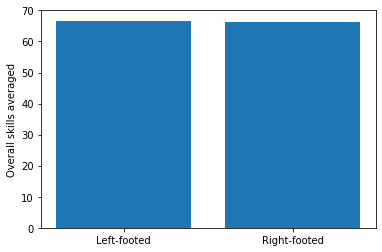

In [11]:
# Do left-footed players have more quality?


#Calculamos promedio de overall, filtrado por zurdo/diestro

df_left = df[(df['preferred_foot'] == 'Left')]['overall'].mean()

df_right = df[(df['preferred_foot'] == 'Right')]['overall'].mean()


print('Overall skills averaged for left footed = ', df_left)
print('Overall skills averaged for right footed = ', df_right)


#We make the graph:

foot = ['Left-footed', 'Right-footed']
overall = [df_left, df_right]

fig, ax = plt.subplots()

ax.set_ylabel('Overall skills averaged') # etiqueta en el eje Y

plt.bar(foot, overall)
plt.show()


In [12]:
# Best header?

df[(df['attacking_heading_accuracy'] == df['attacking_heading_accuracy'].max())]


,sofifa_id,short_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,release_clause_eur,team_position,team_jersey_number,joined,contract_valid_until,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
307,189068,B. Dost,30,1989-05-31,196,89,Netherlands,Sporting CP,82,82,21500000,23000,ST,Right,3,3,2,Medium/Medium,Lean,43000000.0,SUB,28.0,2016-08-28,2021.0,50.0,82.0,57.0,66.0,45.0,80.0,NaN,NaN,NaN,NaN,NaN,NaN,38,86,93,73,83,68,61,30,37,75,46,53,34,82,32,82,49,70,92,70,68,39,88,67,90,81,38,45,26,NaN,NaN,NaN,NaN,NaN
310,189805,L. de Jong,28,1990-08-27,188,86,Netherlands,Sevilla FC,82,82,23000000,29000,ST,Right,2,3,2,Medium/High,Normal,48300000.0,ST,19.0,2019-07-01,2023.0,56.0,79.0,71.0,69.0,51.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,66,82,93,78,84,66,63,69,66,77,54,58,58,83,60,84,81,84,84,69,54,40,86,69,67,80,58,43,37,NaN,NaN,NaN,NaN,NaN
966,205850,L. Pavoletti,30,1988-11-26,188,85,Italy,Cagliari,78,78,10000000,38000,ST,Right,2,3,3,High/Low,Normal,17000000.0,RS,30.0,2018-07-01,2022.0,60.0,76.0,51.0,68.0,37.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,33,82,93,68,80,66,49,28,36,74,62,58,64,77,60,80,86,70,84,56,69,24,83,56,67,76,49,21,17,NaN,NaN,NaN,NaN,NaN


In [13]:
# Best dribbler?

df[(df['dribbling'] == df['dribbling'].max())]

,sofifa_id,short_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,release_clause_eur,team_position,team_jersey_number,joined,contract_valid_until,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,158023,L. Messi,32,1987-06-24,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Medium/Low,Messi,195800000.0,RW,10.0,2004-07-01,2021.0,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,NaN,NaN,NaN,NaN,NaN


In [14]:
df[df['club'] == 'Real Madrid']

,sofifa_id,short_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,release_clause_eur,team_position,team_jersey_number,joined,contract_valid_until,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
4,183277,E. Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,91,91,90000000,470000,"LW, CF",Right,4,4,4,High/Medium,Normal,184500000.0,LW,7.0,2019-07-01,2024.0,91.0,83.0,86.0,94.0,35.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22,NaN,NaN,NaN,NaN,NaN
8,177003,L. Modrić,33,1985-09-09,172,66,Croatia,Real Madrid,90,90,45000000,340000,CM,Right,4,4,4,High/High,Lean,92300000.0,RCM,10.0,2012-08-01,2020.0,74.0,76.0,89.0,89.0,72.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,86,72,55,92,76,87,85,78,88,92,77,71,92,89,93,79,68,85,58,82,62,82,79,91,82,92,68,76,71,NaN,NaN,NaN,NaN,NaN
18,155862,Sergio Ramos,33,1986-03-30,184,82,Spain,Real Madrid,89,89,31500000,300000,CB,Right,4,3,3,High/Medium,Normal,64600000.0,LCB,4.0,2005-08-01,2020.0,72.0,68.0,75.0,73.0,87.0,85.0,NaN,NaN,NaN,NaN,NaN,NaN,66,63,92,80,69,65,74,72,83,83,74,71,78,87,66,79,93,80,85,62,90,88,67,71,86,84,85,87,90,NaN,NaN,NaN,NaN,NaN
28,192119,T. Courtois,27,1992-05-11,199,96,Belgium,Real Madrid,88,89,48000000,235000,GK,Left,4,2,1,Medium/Medium,Courtois,102000000.0,GK,13.0,2018-08-09,2024.0,NaN,NaN,NaN,NaN,NaN,NaN,85.0,89.0,72.0,87.0,49.0,85.0,14,14,13,33,12,13,19,20,35,23,46,52,61,83,45,54,68,38,70,17,23,15,13,44,27,66,20,18,16,85,89,72,85,87
36,182521,T. Kroos,29,1990-01-04,183,76,Germany,Real Madrid,88,88,57000000,330000,CM,Right,4,5,3,Medium/Medium,Normal,116900000.0,LCM,8.0,2014-07-17,2023.0,45.0,80.0,90.0,81.0,70.0,69.0,NaN,NaN,NaN,NaN,NaN,NaN,88,75,58,91,82,80,86,84,92,89,50,41,60,87,71,87,30,74,73,86,60,76,75,89,73,88,72,70,62,NaN,NaN,NaN,NaN,NaN
42,200145,Casemiro,27,1992-02-23,185,84,Brazil,Real Madrid,87,89,53500000,240000,CDM,Right,3,3,2,Medium/High,Normal,113700000.0,CDM,14.0,2013-07-11,2021.0,62.0,72.0,75.0,72.0,85.0,89.0,NaN,NaN,NaN,NaN,NaN,NaN,58,64,76,83,61,69,63,74,82,78,58,66,62,86,66,86,87,88,90,81,89,86,69,77,66,84,84,87,86,NaN,NaN,NaN,NaN,NaN
46,165153,K. Benzema,31,1987-12-19,185,81,France,Real Madrid,87,87,45000000,285000,"CF, ST",Right,4,4,4,Medium/Low,Normal,92300000.0,CF,9.0,2009-07-09,2021.0,76.0,82.0,80.0,86.0,39.0,77.0,NaN,NaN,NaN,NaN,NaN,NaN,75,84,83,85,83,86,81,73,72,90,78,74,78,85,69,82,77,79,80,76,65,39,88,86,82,87,47,24,18,NaN,NaN,NaN,NaN,NaN
53,193041,K. Navas,32,1986-12-15,185,80,Costa Rica,Real Madrid,87,87,30500000,195000,GK,Right,3,3,1,Medium/Medium,Normal,62500000.0,SUB,1.0,2014-08-03,2020.0,NaN,NaN,NaN,NaN,NaN,NaN,90.0,81.0,75.0,90.0,53.0,82.0,11,15,11,30,11,16,11,15,37,19,54,53,60,84,61,56,74,39,75,13,32,20,16,68,25,67,28,14,14,90,81,75,82,90
62,197781,Isco,27,1992-04-21,176,79,Spain,Real Madrid,86,87,51000000,245000,"CAM, CM, LW",Right,3,3,4,Medium/Low,Normal,108400000.0,SUB,22.0,2013-07-03,2022.0,71.0,77.0,83.0,91.0,59.0,60.0,NaN,NaN,NaN,NaN,NaN,NaN,78,79,55,84,67,92,88,76,80,93,74,68,85,76,90,69,61,62,59,84,58,61,79,87,76,86,58,64,51,NaN,NaN,NaN,NaN,NaN
76,201535,R. Varane,26,1993-04-25,191,81,France,Real Madrid,85,90,45000000,205000,CB,R

In [15]:
# Fatest player?

df[(df['weight_kg'] == df['weight_kg'].max())]

,sofifa_id,short_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,release_clause_eur,team_position,team_jersey_number,joined,contract_valid_until,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
10693,156321,A. Akinfenwa,37,1982-05-10,178,110,England,Wycombe Wanderers,65,65,190000,2000,ST,Right,1,3,2,Low/Low,Akinfenwa,333000.0,ST,20.0,2016-07-10,2020.0,43.0,63.0,54.0,56.0,35.0,81.0,NaN,NaN,NaN,NaN,NaN,NaN,44,64,72,60,59,52,50,42,51,67,37,48,35,61,71,70,49,69,97,54,66,17,68,61,64,67,32,40,24,NaN,NaN,NaN,NaN,NaN
